In [4]:
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

class MixtureOfGaussiansDataset(Dataset):
    def __init__(self, means, covariances, num_samples):
        """
        Args:
            means (Tensor): A tensor of shape (K, D) for K Gaussians in D dimensions.
            covariances (Tensor): A tensor of shape (K, D, D) representing K covariance matrices.
            num_samples (int): The total number of samples to generate.
        """
        super(MixtureOfGaussiansDataset, self).__init__()

        self.means = means
        self.covariances = covariances
        self.num_samples = num_samples
        self.num_gaussians = means.shape[0]

        self.samples, self.labels = self._generate_samples()

    def _generate_samples(self):
        labels = torch.randint(self.num_gaussians, (self.num_samples,))
        samples = torch.normal(0, 1, size=(self.num_samples, self.means.shape[1]))
        for i in range(self.num_gaussians):
            samples[labels == i] = samples[labels == i] @ torch.linalg.cholesky(self.covariances[i]).T + self.means[i]
        return samples, labels

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return self.samples[idx], self.labels[idx]


In [6]:
means = torch.tensor([[1, 1], [1, -1], [-1, -1], [-1, 1]], dtype=torch.float32)
covariances = 0.1*torch.stack([torch.eye(2), torch.eye(2), torch.eye(2), torch.eye(2)])

dataset = MixtureOfGaussiansDataset(means, covariances, 1000)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

store_final_x = []
store_final_y = []

for batch_idx, (data, target) in enumerate(train_loader):
    store_final_x.extend(data.detach().numpy())
    store_final_y.extend(target.detach().numpy())

In [8]:
store_final_x = np.array(store_final_x)
store_final_y = np.array(store_final_y)

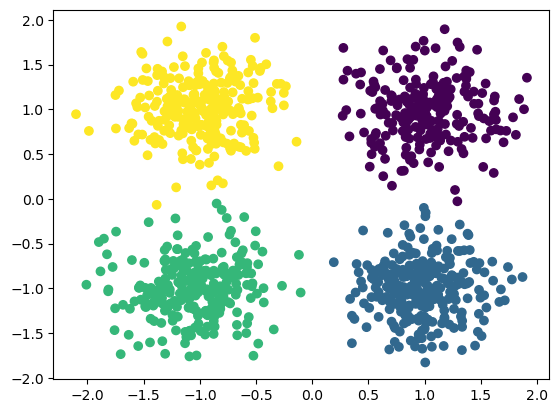

In [11]:
plt.scatter(store_final_x[:,0], store_final_x[:,1], c=store_final_y, cmap='viridis')